# Indian Premier League Data Analysis 

In this project i look at Indian Premier League Dataset which is a very pupular cricketing tournament held in India every year in which players from all over the world participate. Here we are using CRISP-DM process to analyze the data.

CRISP-DM (Cross-Industry Standard Process for Data Mining) consists of:

1) Business Understanding

2) Data Understanding

3) Data Preparation/ Wrangling

4) Data Modeling

5) Data Evaluation

6) Deployment

# Data

The data can be found in this [link](https://www.kaggle.com/nowke9/ipldata). The dataset has 2 files: 
    1. matches.csv having every match detail from 2008 to 2019 and
    2. deliveries.csv having ball by ball detail for every match.

# Questions of Interest

1) Toss Call based on Venue of the Match.

2) Venue-Wise - What decision does teams generally take after winning the toss

3) Matches hosted in each city

4) Most Dismissals by a WicketKeeper

5) Does Home Ground Advantage has any effect on result of the game?

6) How many times each teams have won the toss ?

7) Decision upon winning the toss by teams.

8) % of matches won batting first/fielding first

### Results of a game depends upon which features. (ML Model)

This project is part of term 2 of udacity data science nanodegree.

# Data Understanding

#### In this section i will try to understand each dataset and get a feeling about the different columns provided

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_matches = pd.read_csv('matches.csv')
df_deliveries = pd.read_csv('deliveries.csv')

In [3]:
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

### Observations:

1) There are 756 rows and 18 columns.

2) There are null values in columns: (city,winner,player_of_match,umpire1,umpire2,umpire3).

3) There are 5 numerical columns and rest are categorical columns

In [6]:
df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

### Observations:

1) There are 179078 rows and 21 columns.

2) There are null values in columns: (player_dismissed,dismissal_kind,fielder).

3) There are 8 categorical columns and rest are numerical columns

## Different values for toss decisons and their counts

field    463
bat      293
Name: toss_decision, dtype: int64


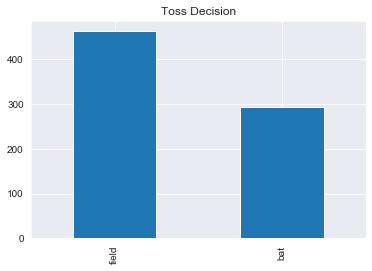

In [7]:
print(df_matches.toss_decision.value_counts())
df_matches.toss_decision.value_counts().plot.bar(title='Toss Decision');

## Different Venues where match is held

In [8]:
temp = df_matches[['city','venue']]
temp = temp.drop_duplicates().reset_index()

In [9]:
temp.drop(columns=['index'],inplace=True)
temp

,city,venue
0,Hyderabad,"Rajiv Gandhi International Stadium, Uppal"
1,Pune,Maharashtra Cricket Association Stadium
2,Rajkot,Saurashtra Cricket Association Stadium
3,Indore,Holkar Cricket Stadium
4,Bangalore,M Chinnaswamy Stadium
5,Mumbai,Wankhede Stadium
6,Kolkata,Eden Gardens
7,Delhi,Feroz Shah Kotla
8,Chandigarh,"Punjab Cricket Association IS Bindra Stadium, ..."
9,Kanpur,Green Park


### Observations:

1) Same Venue is repeated twice due to different names of same stadium. Hence we have to make everything consistent.

# Data Preparation/Wrangling

#### 1) For Question 1, toss decision based on venue - Checking if any null values exist

In [10]:
np.sum(df_matches[['toss_decision','venue']].isna())

## Hence No missing values

toss_decision    0
venue            0
dtype: int64

#### 2) There are null values in city column, fixing it based on venue column

In [11]:
df_matches[df_matches.city.isna()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


#### Observation : As we can see above all missing cities were for stadium in Dubai

In [12]:
df_matches.city.fillna(value='Dubai',inplace=True)

#### 3)Cleaning city column

In [13]:
df_matches.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali', 'Bengaluru'], dtype=object)

#### Observation : Bangalore is also written as Bengaluru. 

In [ ]:
df_matches.loc[df_matches['city'] == 'Bengaluru', 'city'] = 'Bangalore'

In [14]:
cities = list(df_matches.city.unique())
cities

['Hyderabad',
 'Pune',
 'Rajkot',
 'Indore',
 'Bangalore',
 'Mumbai',
 'Kolkata',
 'Delhi',
 'Chandigarh',
 'Kanpur',
 'Jaipur',
 'Chennai',
 'Cape Town',
 'Port Elizabeth',
 'Durban',
 'Centurion',
 'East London',
 'Johannesburg',
 'Kimberley',
 'Bloemfontein',
 'Ahmedabad',
 'Cuttack',
 'Nagpur',
 'Dharamsala',
 'Kochi',
 'Visakhapatnam',
 'Raipur',
 'Ranchi',
 'Abu Dhabi',
 'Sharjah',
 'Dubai',
 'Mohali',
 'Bengaluru']

#### 4) Cleaning Venues Column

In [15]:
temp = df_matches[['city','venue']]
temp = temp.drop_duplicates().reset_index()
temp.drop(columns=['index'],inplace=True)
temp

,city,venue
0,Hyderabad,"Rajiv Gandhi International Stadium, Uppal"
1,Pune,Maharashtra Cricket Association Stadium
2,Rajkot,Saurashtra Cricket Association Stadium
3,Indore,Holkar Cricket Stadium
4,Bangalore,M Chinnaswamy Stadium
5,Mumbai,Wankhede Stadium
6,Kolkata,Eden Gardens
7,Delhi,Feroz Shah Kotla
8,Chandigarh,"Punjab Cricket Association IS Bindra Stadium, ..."
9,Kanpur,Green Park


In [16]:
temp.city.value_counts()

Mumbai            3
Pune              2
Chandigarh        2
Chennai           2
Mohali            2
Delhi             2
Bengaluru         2
Visakhapatnam     2
Hyderabad         2
Cape Town         1
Dubai             1
Raipur            1
Indore            1
Kolkata           1
Dharamsala        1
Ahmedabad         1
Centurion         1
Cuttack           1
Bloemfontein      1
Port Elizabeth    1
Nagpur            1
Kanpur            1
East London       1
Kimberley         1
Ranchi            1
Kochi             1
Abu Dhabi         1
Bangalore         1
Jaipur            1
Durban            1
Johannesburg      1
Sharjah           1
Rajkot            1
Name: city, dtype: int64

#### OBSERVATIONS: DUPLICATES
1) Chandigarh & Mohali : 'Punjab Cricket Association IS Bindra Stadium, Mohali','Punjab Cricket Association Stadium, Mohali','IS Bindra Stadium'

2) Hyderabad: 'Rajiv Gandhi Intl. Cricket Stadium','Rajiv Gandhi International Stadium, Uppal'

3) Delhi : 'Feroz Shah Kotla', 'Feroz Shah Kotla Ground'

4) Chennai : 'M. A. Chidambaram Stadium','MA Chidambaram Stadium, Chepauk'

5) Visakhapatnam : 'ACA-VDCA Stadium','Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'

6) Pune:'Maharashtra Cricket Association Stadium', 'Subrata Roy Sahara Stadium'

7) Bangalore: M Chinnaswamy Stadium,M. Chinnaswamy Stadium


In [17]:
df_matches.loc[df_matches['city'] == 'Mohali', 'venue'] = 'Punjab Cricket Association IS Bindra Stadium, Mohali'
df_matches.loc[df_matches['city'] == 'Hyderabad', 'venue'] = 'Rajiv Gandhi International Stadium, Uppal'
df_matches.loc[df_matches['city'] == 'Delhi', 'venue'] = 'Feroz Shah Kotla Ground'
df_matches.loc[df_matches['city'] == 'Chennai', 'venue'] = 'MA Chidambaram Stadium, Chepauk'
df_matches.loc[df_matches['city'] == 'Visakhapatnam', 'venue'] = 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
df_matches.loc[df_matches['city'] == 'Pune', 'venue'] = 'Maharashtra Cricket Association Stadium'
df_matches.loc[df_matches['city'] == 'Bangalore', 'venue'] = 'M. Chinnaswamy Stadium'

In [18]:
temp = df_matches[['city','venue']]
temp = temp.drop_duplicates().reset_index()
temp.drop(columns=['index'],inplace=True)
temp.city.value_counts()

Mumbai            3
Bengaluru         2
Chandigarh        2
Cuttack           1
East London       1
Kanpur            1
Nagpur            1
Port Elizabeth    1
Bloemfontein      1
Rajkot            1
Ranchi            1
Ahmedabad         1
Delhi             1
Mohali            1
Chennai           1
Raipur            1
Kimberley         1
Pune              1
Kochi             1
Abu Dhabi         1
Bangalore         1
Visakhapatnam     1
Durban            1
Johannesburg      1
Dubai             1
Cape Town         1
Sharjah           1
Jaipur            1
Centurion         1
Dharamsala        1
Kolkata           1
Indore            1
Hyderabad         1
Name: city, dtype: int64

#### 5) Cleaning Team Names

In [19]:
df_matches.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [20]:
df_matches.loc[df_matches['team1'] == 'Rising Pune Supergiant', 'team1'] = 'Rising Pune Supergiants'
df_matches.loc[df_matches['team2'] == 'Rising Pune Supergiant', 'team2'] = 'Rising Pune Supergiants'
df_matches.loc[df_matches['toss_winner'] == 'Rising Pune Supergiant', 'toss_winner'] = 'Rising Pune Supergiants'
df_matches.loc[df_matches['winner'] == 'Rising Pune Supergiant', 'winner'] = 'Rising Pune Supergiants'

# Analysis/Modelling

## 1) Toss Call Based on Venue of the Match

In [21]:
df_toss = df_matches[['city','toss_decision','toss_winner','winner']]

In [22]:
df_toss.count()

city             756
toss_decision    756
toss_winner      756
winner           752
dtype: int64

#### Removing Rows where winner is null

In [23]:
df_toss = df_toss.dropna(subset=['winner'],axis=0)

In [24]:
# TEAM WINNING THE MATCH DID (BATTING/FIELDING) FIRST

def decision(row):
    
    '''
    Input: Every row in the dataframe
    
    Output: bat/field (i.e. Team winning the match did first)
    '''
    if row['toss_winner'] == row['winner']:
        val = row['toss_decision']
    else:
        if row['toss_decision'] == 'bat':
            val = 'field'
        else:
            val = 'bat'
    return val
# Apply the above function to the toss DataFrame
df_toss['winning_decision'] = df_toss.apply(decision, axis=1)
# Get first 5 rows
df_toss.head()

,city,toss_decision,toss_winner,winner,winning_decision
0,Hyderabad,field,Royal Challengers Bangalore,Sunrisers Hyderabad,bat
1,Pune,field,Rising Pune Supergiants,Rising Pune Supergiants,field
2,Rajkot,field,Kolkata Knight Riders,Kolkata Knight Riders,field
3,Indore,field,Kings XI Punjab,Kings XI Punjab,field
4,Bangalore,bat,Royal Challengers Bangalore,Royal Challengers Bangalore,bat


In [25]:
## Now taking only city and toss decision to be made to win the match
df_toss = df_toss[['city','winning_decision']]
df_toss.head()

,city,winning_decision
0,Hyderabad,bat
1,Pune,field
2,Rajkot,field
3,Indore,field
4,Bangalore,bat


In [26]:
## We now have to use one hot encoder to convert categorical variables and concat with original df

df_toss = pd.concat([df_toss.drop(['winning_decision'],axis=1),pd.get_dummies(df_toss.winning_decision,prefix='winning_decision',prefix_sep='_')],axis=1)
df_toss.head()

,city,winning_decision_bat,winning_decision_field
0,Hyderabad,1,0
1,Pune,0,1
2,Rajkot,0,1
3,Indore,0,1
4,Bangalore,1,0


In [27]:
# Group by city and then get sum of all the other columns
df_toss = df_toss.groupby('city').sum().reset_index()
# Get the total matches played
df_toss['total'] = df_toss.winning_decision_bat+df_toss.winning_decision_field
# Calculate batting decision percentage
df_toss['bat_decision_win'] = round(((df_toss.winning_decision_bat)/df_toss.total)*100,2)
# Calculate feilding decision percentage
df_toss['field_decision_win'] = round(((df_toss.winning_decision_field)/df_toss.total)*100,2)
# Get first 5 rows
df_toss.head()

,city,winning_decision_bat,winning_decision_field,total,bat_decision_win,field_decision_win
0,Abu Dhabi,4,3,7,57.14,42.86
1,Ahmedabad,6,6,12,50.00,50.00
2,Bangalore,27,37,64,42.19,57.81
3,Bengaluru,6,7,13,46.15,53.85
4,Bloemfontein,1,1,2,50.00,50.00


In [28]:
## Removing Unnecessary Columns
df_toss = df_toss.drop(columns=['winning_decision_bat','winning_decision_field','total'],axis=1)
df_toss

,city,bat_decision_win,field_decision_win
0,Abu Dhabi,57.14,42.86
1,Ahmedabad,50.00,50.00
2,Bangalore,42.19,57.81
3,Bengaluru,46.15,53.85
4,Bloemfontein,50.00,50.00
5,Cape Town,71.43,28.57
6,Centurion,33.33,66.67
7,Chandigarh,43.48,56.52
8,Chennai,61.40,38.60
9,Cuttack,57.14,42.86


### Conclusion:
For a instance, if we choose Kolkata as the city and you field first, there is a 61% chance that you will win the game. Again, we are not sure about it, but from the history data, we can give this statement.

## 2) Venue-Wise - What decision does teams generally take after winning the toss

In [29]:
decision_toss = df_matches[['city','toss_decision','toss_winner','winner']]
decision_toss = decision_toss.dropna(subset=['winner'],axis=0)

In [30]:
decision_toss = decision_toss[['city','toss_decision']]
decision_toss = pd.concat([decision_toss.drop(['toss_decision'],axis=1),pd.get_dummies(decision_toss.toss_decision,prefix='toss_decision',prefix_sep='_')],axis=1)
decision_toss.head()

,city,toss_decision_bat,toss_decision_field
0,Hyderabad,0,1
1,Pune,0,1
2,Rajkot,0,1
3,Indore,0,1
4,Bangalore,1,0


In [31]:
# Group by city and then get sum of all the other columns
decision_toss = decision_toss.groupby('city').sum().reset_index()
# Get the total matches played
decision_toss['total'] = decision_toss.toss_decision_bat+decision_toss.toss_decision_field
# Calculate batting decision percentage
decision_toss['bat_decision_toss'] = round(((decision_toss.toss_decision_bat)/decision_toss.total)*100,2)
# Calculate feilding decision percentage
decision_toss['field_decision_toss'] = round(((decision_toss.toss_decision_field)/decision_toss.total)*100,2)
## Removing Unnecessary Columns
decision_toss = decision_toss.drop(columns=['toss_decision_bat','toss_decision_field','total'],axis=1)
decision_toss

,city,bat_decision_toss,field_decision_toss
0,Abu Dhabi,57.14,42.86
1,Ahmedabad,50.00,50.00
2,Bangalore,14.06,85.94
3,Bengaluru,0.00,100.00
4,Bloemfontein,50.00,50.00
5,Cape Town,57.14,42.86
6,Centurion,50.00,50.00
7,Chandigarh,34.78,65.22
8,Chennai,63.16,36.84
9,Cuttack,28.57,71.43


### Conclusion :

For a instance, if we choose Kolkata as the city, 63.64% of times teams decide to field on winning the toss.

## 3) Matches hosted in each city

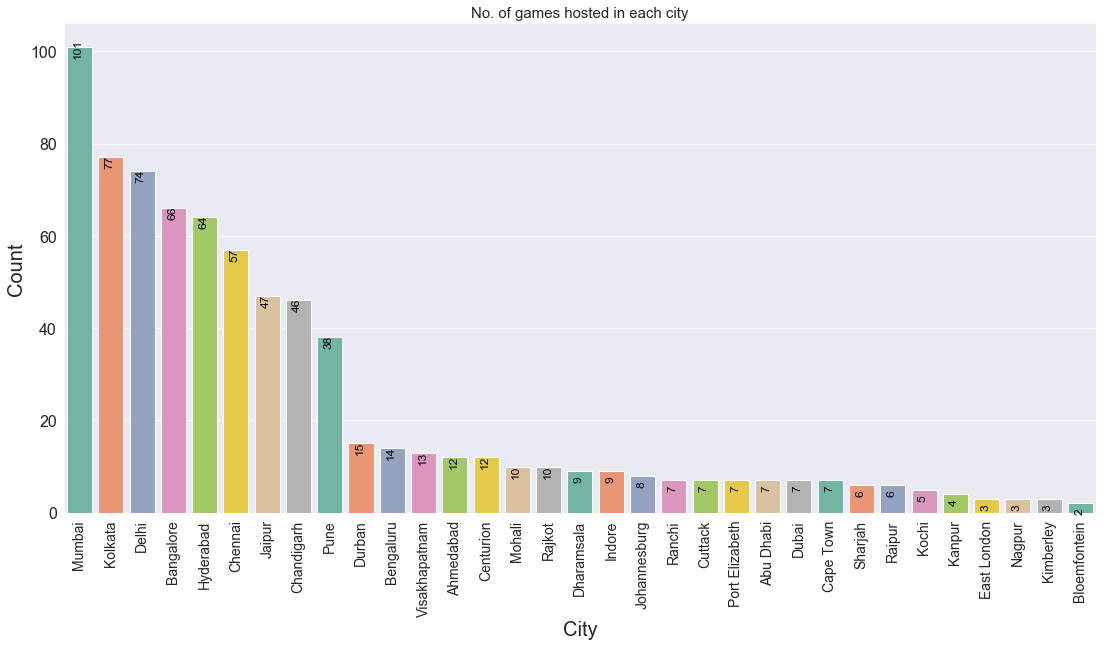

In [32]:
fig=plt.gcf()
fig.set_size_inches(18.5,9)
sns.countplot(df_matches['city'],order=df_matches['city'].value_counts().index,palette='Set2')
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=16)
plt.xlabel('City',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('No. of games hosted in each city',fontsize=15)
count=0
cities=pd.DataFrame(df_matches['city'].value_counts())
cities['name']=df_matches['city'].value_counts().index
for i in cities['city']:
    plt.text(count-0.2,i-2,str(i),rotation=90,color='black',size=12)
    count+=1
plt.show()

### Conclusion:

We can see that most matches are held in Mumbai as it has 3 stadiums over there. Kolkata's Eden Garden hosts the next maximum number of matches

## 4) Most Dismissals by Wicketkeeper

In [33]:
## Different types of dismissals
df_deliveries['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [34]:
## Getting the wicket_keeper names and no. of stumping done.
wicket_keeper_stumping = df_deliveries[df_deliveries['dismissal_kind']=='stumped']['fielder'].value_counts().reset_index()
# Renaming the column accordingly
wicket_keeper_stumping.rename(columns={'index':'wicket_keeper','fielder':'stumping'}, inplace=True)
# Get first 5 rows
wicket_keeper_stumping.head()

,wicket_keeper,stumping
0,MS Dhoni,38
1,RV Uthappa,32
2,KD Karthik,29
3,WP Saha,18
4,AC Gilchrist,16


In [35]:
# Getting the names of all the wicket_keepers
wicket_keeper_list = wicket_keeper_stumping.wicket_keeper.tolist()

# Take the dismissal kind as caught and fielder should be present in the wicket_keeper_list
wicket_keeper_catches = df_deliveries[(df_deliveries['dismissal_kind']=='caught') & (df_deliveries['fielder'].isin(wicket_keeper_list))]['fielder'].value_counts().reset_index()
# Rename the columns accordingly
wicket_keeper_catches.rename(columns={'index':'wicket_keeper','fielder':'catches'}, inplace=True)
# Get first 5 rows
wicket_keeper_catches.head()

,wicket_keeper,catches
0,KD Karthik,109
1,MS Dhoni,98
2,AB de Villiers,93
3,RV Uthappa,84
4,PA Patel,69


In [36]:
# Left Outer Join on wicket_keeper_stumping and wicket_keeper_catches
wicket_keeper_dismissals = pd.merge(wicket_keeper_stumping,wicket_keeper_catches,on='wicket_keeper',how='outer')
# Convert the NaN values to 0
wicket_keeper_dismissals.catches = wicket_keeper_dismissals.catches.fillna(0)
# Convert the data-type of catches to integer (from float)
wicket_keeper_dismissals.catches = wicket_keeper_dismissals.catches.astype(int)
# Get the total by adding number of stumping and catches
wicket_keeper_dismissals['total'] = wicket_keeper_dismissals.stumping + wicket_keeper_dismissals.catches
# Sort the DataFrame by total
wicket_keeper_dismissals = wicket_keeper_dismissals.sort_values(['total'], ascending=False).reset_index()
# Drop the index column
wicket_keeper_dismissals.drop('index', axis=1, inplace=True)
# Get first 5 rows
wicket_keeper_dismissals.head()

,wicket_keeper,stumping,catches,total
0,KD Karthik,29,109,138
1,MS Dhoni,38,98,136
2,RV Uthappa,32,84,116
3,AB de Villiers,7,93,100
4,PA Patel,16,69,85


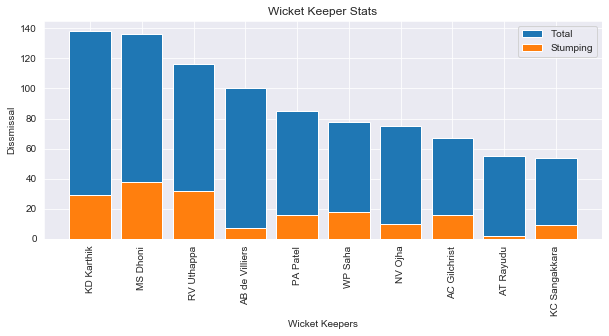

In [37]:
wicket_keeper_dismissals_top10 = wicket_keeper_dismissals.head(10)
plt.figure(figsize=(10,4))
plt.bar(wicket_keeper_dismissals_top10['wicket_keeper'],wicket_keeper_dismissals_top10['total'], label='Total')
plt.bar(wicket_keeper_dismissals_top10['wicket_keeper'],wicket_keeper_dismissals_top10['stumping'], label='Stumping')
plt.xticks(rotation=90)
plt.title('Wicket Keeper Stats')
plt.xlabel('Wicket Keepers')
plt.ylabel('Dissmissal')
plt.legend(loc='upper right')
plt.show()

### Conclusion:

As we can see most number of dismissal was done by KD Karthik while the maximum number of stumpings was done by MS Dhoni

## 5) Home Advantage

Each team plays two matches against the other teams, one in its home city and other in the home city of the opposite team. It would be interesting see if playing in home city increases a teams chances of a win.

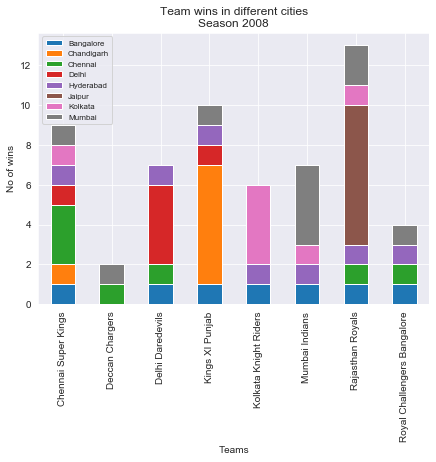

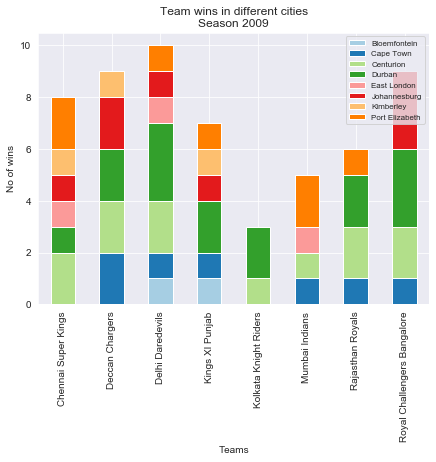

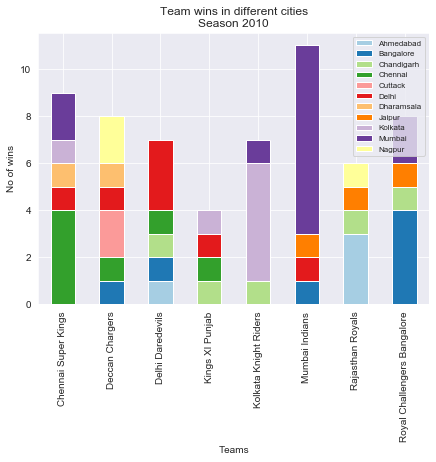

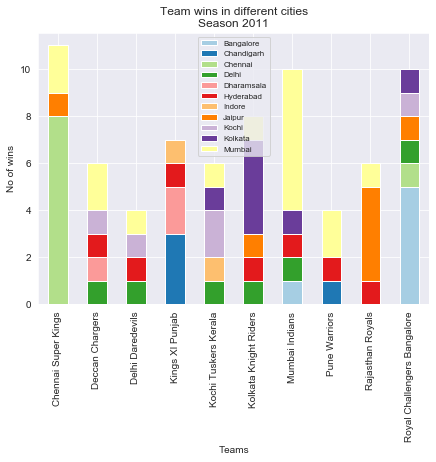

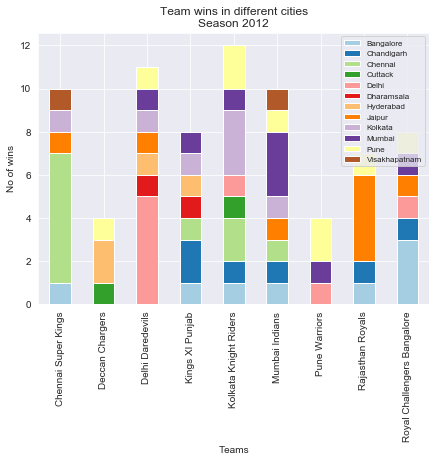

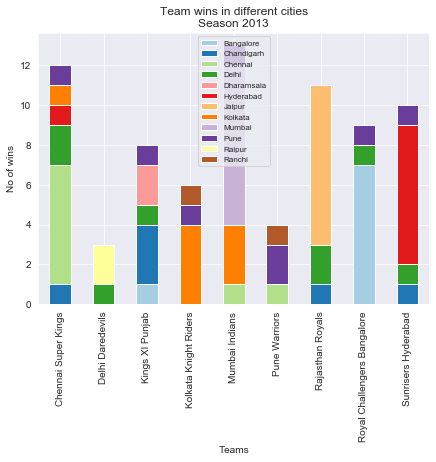

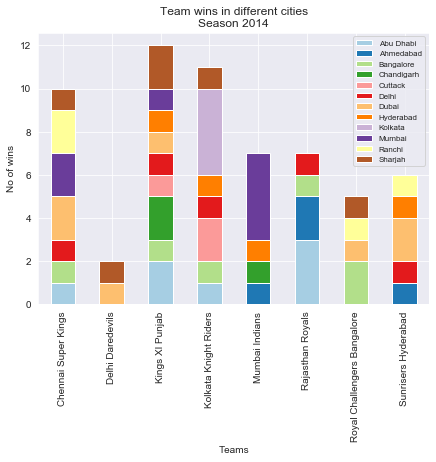

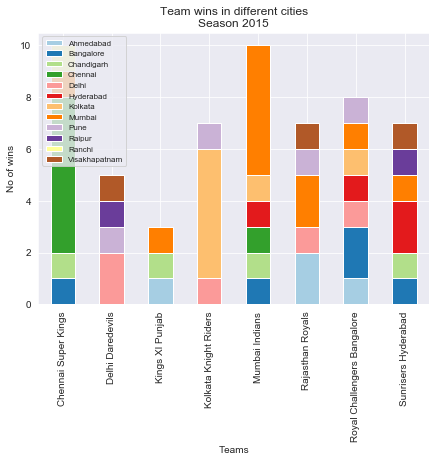

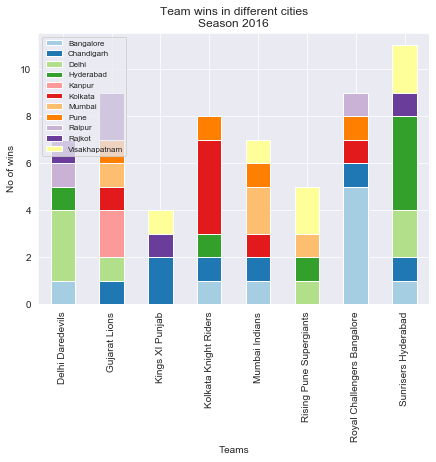

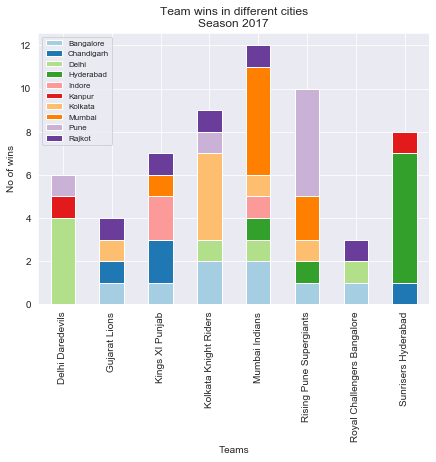

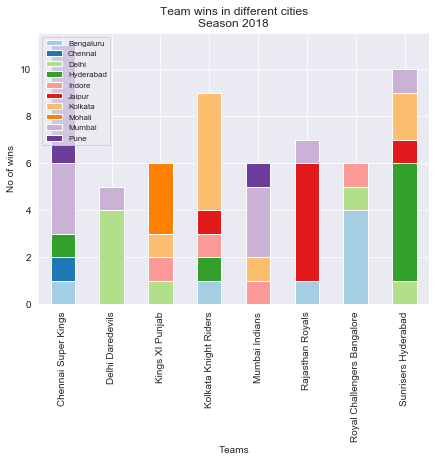

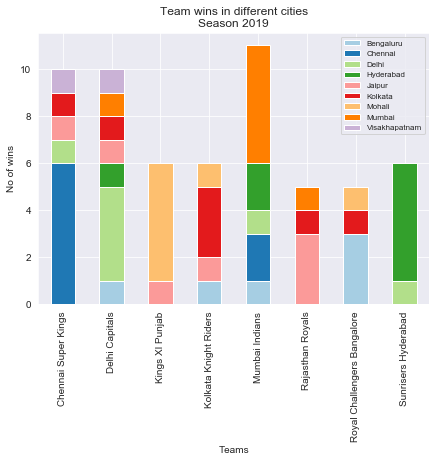

In [38]:
x, y = 2008, 2020
while x < y:
    wins_percity = df_matches[df_matches['season'] == x].groupby(['winner', 'city'])['id'].count().unstack()
    plot = wins_percity.plot(kind='bar', stacked=True, title="Team wins in different cities\nSeason "+str(x), figsize=(7, 5))
    sns.set_palette("Paired", len(df_matches['city'].unique()))
    plot.set_xlabel("Teams")
    plot.set_ylabel("No of wins")
    plot.legend(loc='best', prop={'size':8})
    x+=1

### Conclusion:

As is evident from all the graphs above, home advantage is a big factor that determines the result of the game. Generally teams playing at their home ground tends to win or they have more chances of winning.

## 6) How Many times each teams have won the toss

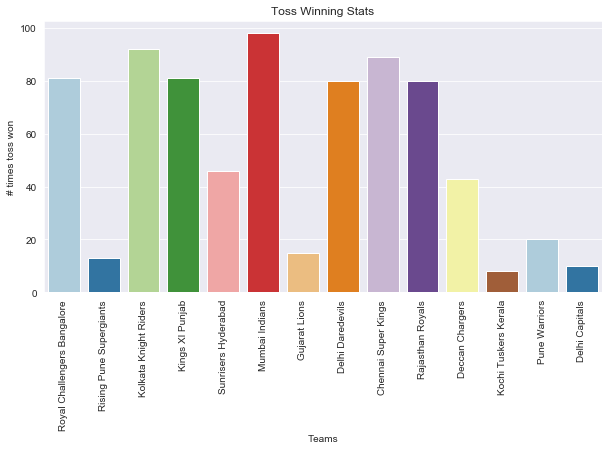

In [44]:
plt.figure(figsize=(10,5))
sns.countplot( x = 'toss_winner', data = df_matches)
plt.xticks(rotation='vertical')
plt.title('Toss Winning Stats')
plt.xlabel('Teams')
plt.ylabel('# times toss won')
plt.show()

### Conclusions:

As can be seen from the graph, Mumbai Indians have won the toss maximum number of times in IPL.

## 7) Decision upon winning the toss by teams

In [49]:
team_decision = df_matches[['id','toss_winner','toss_decision']]
team_decision.head()

,id,toss_winner,toss_decision
0,1,Royal Challengers Bangalore,field
1,2,Rising Pune Supergiants,field
2,3,Kolkata Knight Riders,field
3,4,Kings XI Punjab,field
4,5,Royal Challengers Bangalore,bat


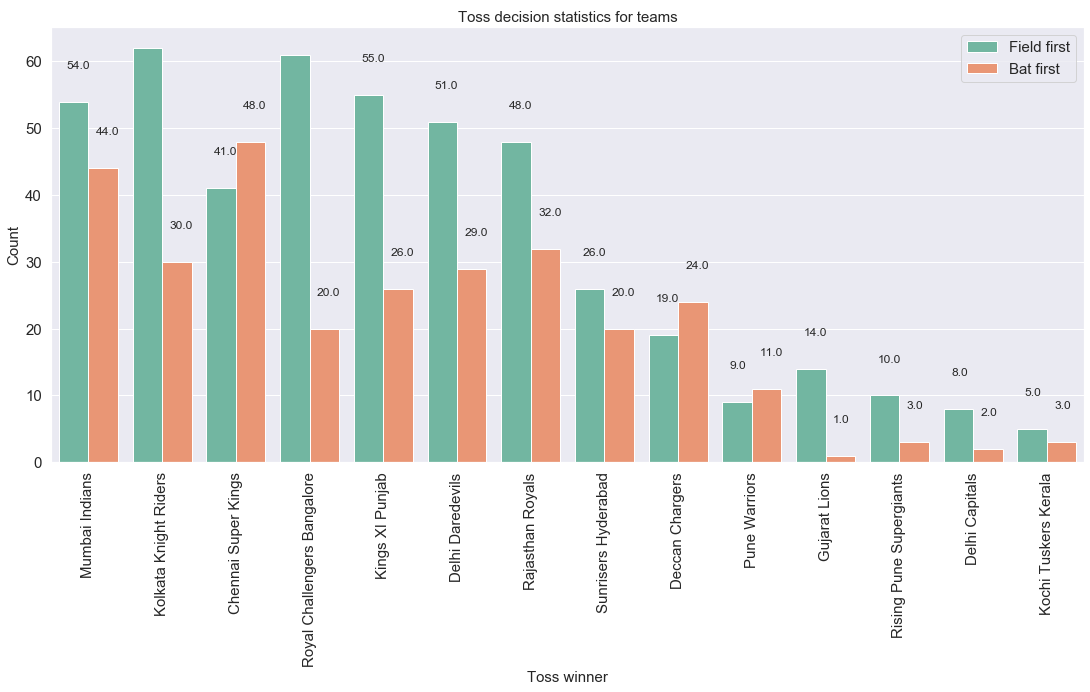

In [50]:
x = np.arange(len(team_decision['toss_winner'].value_counts().index))
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,8)
ax = sns.countplot(team_decision['toss_winner'],order=team_decision['toss_winner'].value_counts().index,palette='Set2',hue=team_decision['toss_decision'])
plt.title('Toss decision statistics for teams',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(['Field first','Bat first'],loc='best',fontsize=15)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

plt.show()

In [ ]:
team_decision = team_decision[['toss_winner','toss_decision']]
team_decision = pd.concat([team_decision.drop(['toss_decision'],axis=1),pd.get_dummies(team_decision.toss_decision,prefix='toss_decision',prefix_sep='_')],axis=1)
# Group by team and then get sum of all the other columns
team_decision = team_decision.groupby('toss_winner').sum().reset_index()
# Get the total matches played
team_decision['total'] = team_decision.toss_decision_bat+team_decision.toss_decision_field
# Calculate batting decision percentage
team_decision['bat_decision_toss'] = round(((team_decision.toss_decision_bat)/team_decision.total)*100,2)
# Calculate feilding decision percentage
team_decision['field_decision_toss'] = round(((team_decision.toss_decision_field)/team_decision.total)*100,2)
## Removing Unnecessary Columns
team_decision = team_decision.drop(columns=['toss_decision_bat','toss_decision_field','total'],axis=1)
team_decision

### Conclusions:

As can be seen from the above graph and table, teams tend to select fielding first after winning the toss.

## 8) Win Percentage Batting First/Fielding First for different teams

In [54]:
temp = df_matches[['team1','team2','toss_winner','toss_decision','winner']]
temp = temp.dropna(axis=0)
temp.head()

,team1,team2,toss_winner,toss_decision,winner
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad
1,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,Rising Pune Supergiants
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders
3,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore


In [55]:
# Was the toss winning team also the game winning team

def decision(row):
    
    '''
    Input: Every row in the dataframe
    
    Output: bat/field (i.e. Team winning the match did first)
    '''
    if row['toss_winner'] == row['winner']:
        val = row['toss_decision']
    else:
        if row['toss_decision'] == 'bat':
            val = 'field'
        else:
            val = 'bat'
    return val
# Apply the above function to the toss DataFrame
temp['winningteam_1st_innings'] = temp.apply(decision, axis=1)
# Get first 5 rows
temp.head()

,team1,team2,toss_winner,toss_decision,winner,winningteam_1st_innings
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,bat
1,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,Rising Pune Supergiants,field
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,field
3,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,field
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,bat


In [56]:
temp1 = temp[['winner','winningteam_1st_innings']]
## We now have to use one hot encoder to convert categorical variables and concat with original df
temp1 = pd.concat([temp1.drop(['winningteam_1st_innings'],axis=1),pd.get_dummies(temp1.winningteam_1st_innings,prefix='1st_innings',prefix_sep='_')],axis=1)
temp1.head()

,winner,1st_innings_bat,1st_innings_field
0,Sunrisers Hyderabad,1,0
1,Rising Pune Supergiants,0,1
2,Kolkata Knight Riders,0,1
3,Kings XI Punjab,0,1
4,Royal Challengers Bangalore,1,0


In [57]:
# Group by city and then get sum of all the other columns
temp1 = temp1.groupby('winner').sum().reset_index()
# Get the total matches played
temp1['total'] = temp1['1st_innings_bat']+temp1['1st_innings_field']
# Calculate batting decision percentage
temp1['bat_first_win'] = round(((temp1['1st_innings_bat'])/temp1.total)*100,2)
# Calculate feilding decision percentage
temp1['field_first_win'] = round(((temp1['1st_innings_field'])/temp1.total)*100,2)
## Removing Unnecessary Columns
temp1 = temp1.drop(columns=['1st_innings_bat','1st_innings_field','total'],axis=1)
temp1

,winner,bat_first_win,field_first_win
0,Chennai Super Kings,51.00,49.00
1,Deccan Chargers,62.07,37.93
2,Delhi Capitals,30.00,70.00
3,Delhi Daredevils,37.31,62.69
4,Gujarat Lions,7.69,92.31
5,Kings XI Punjab,46.34,53.66
6,Kochi Tuskers Kerala,33.33,66.67
7,Kolkata Knight Riders,36.96,63.04
8,Mumbai Indians,53.21,46.79
9,Pune Warriors,50.00,50.00


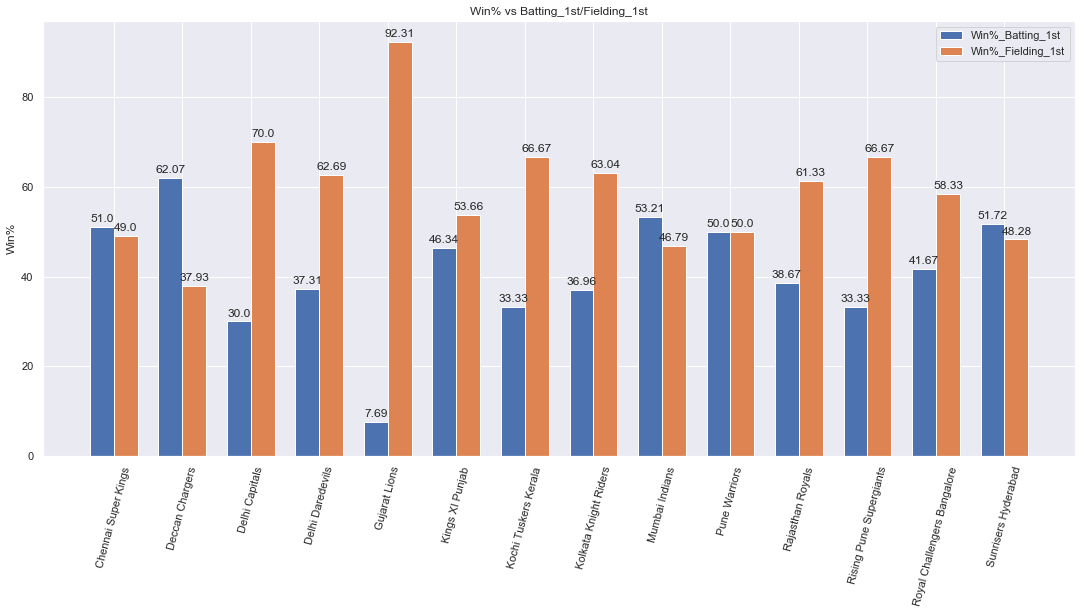

In [58]:
x = np.arange(len(temp1['winner']))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(18.5,8)
rects1 = ax.bar(x - width/2, temp1['bat_first_win'], width, label='Win%_Batting_1st')
rects2 = ax.bar(x + width/2, temp1['field_first_win'], width, label='Win%_Fielding_1st')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Win%')
ax.set_title('Win% vs Batting_1st/Fielding_1st')
ax.set_xticks(x)
ax.set_xticklabels(temp1['winner'])
ax.legend()
plt.xticks(rotation=75)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

# fig.tight_layout()

plt.show()


### Conclusion:

The above graph shows the winning percentage of teams depending on whether they field first or bat first

# Predictive Modelling and Evaluation

In [59]:
df_matches = df_matches.dropna(subset=['winner'],axis=0)

In [60]:
matches = df_matches[['city','team1','team2','toss_winner','toss_decision','winner','venue']]
matches.head(5)

,city,team1,team2,toss_winner,toss_decision,winner,venue
0,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal"
1,Pune,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,Rising Pune Supergiants,Maharashtra Cricket Association Stadium
2,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,Saurashtra Cricket Association Stadium
3,Indore,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,Holkar Cricket Stadium
4,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,M. Chinnaswamy Stadium


In [62]:
from sklearn.preprocessing import LabelEncoder
#encoder
encoder= LabelEncoder()
matches["team1"]=encoder.fit_transform(matches["team1"])
matches["team2"]=encoder.fit_transform(matches["team2"])
matches["winner"]=encoder.fit_transform(matches["winner"].astype(str))
matches["toss_winner"]=encoder.fit_transform(matches["toss_winner"])
matches["venue"]=encoder.fit_transform(matches["venue"])

In [63]:
#outcome variable as a probability of team1 winning
matches.loc[matches["winner"]==matches["team1"],"team1_win"]=1
matches.loc[matches["winner"]!=matches["team1"],"team1_win"]=0

matches.loc[matches["toss_winner"]==matches["team1"],"team1_toss_win"]=1
matches.loc[matches["toss_winner"]!=matches["team1"],"team1_toss_win"]=0

matches["team1_bat"]=0
matches.loc[((matches["team1_toss_win"]==1) & (matches["toss_decision"]=="bat") | ((matches["team1_toss_win"]==0) & (matches["toss_decision"]=="field"))),"team1_bat"]=1


In [64]:
prediction_df=matches[["team1","team2","team1_toss_win","team1_bat","team1_win","venue"]]

#dropping higly correlated features
correlated_features = set()
correlation_matrix = prediction_df.drop('team1_win', axis=1).corr()
correlation_matrix

,team1,team2,team1_toss_win,team1_bat,venue
team1,1.000000,-0.108116,-0.116832,NaN,0.107953
team2,-0.108116,1.000000,-0.008782,NaN,0.084102
team1_toss_win,-0.116832,-0.008782,1.000000,NaN,0.002119
team1_bat,NaN,NaN,NaN,NaN,NaN
venue,0.107953,0.084102,0.002119,NaN,1.000000


In [65]:
prediction_df.drop(columns='team1_bat',inplace=True)

In [66]:
#feature selection
X = prediction_df.drop('team1_win', axis=1)
target = prediction_df['team1_win']
target=target.astype(int)

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#Splitting the data into training and testing data and scaling it
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [69]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.6150


In [70]:
from sklearn.svm import SVC
#SVM
svm=SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)
y_pred = svm.predict(X_test)
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))
print('Accuracy of SVM classifier on test set: {:.4f}'.format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on test set: 0.6327


In [71]:
from sklearn.tree import DecisionTreeClassifier
#Decision Tree Classifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree.score(X_test,y_test)
y_pred = dtree.predict(X_test)
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))
print('Accuracy of decision tree classifier on test set: {:.4f}'.format(dtree.score(X_test, y_test)))


Accuracy of decision tree classifier on test set: 0.5619


In [72]:
from sklearn.ensemble import RandomForestClassifier
#Random Forest Classifier
randomForest= RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
randomForest.score(X_test,y_test)
y_pred = randomForest.predict(X_test)
# print("Confusion matrix\n",confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))
print('Accuracy of random forest classifier on test set: {:.4f}'.format(randomForest.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.5177


### Modelling using OneHotEncoder instead of LabelEncoder

In [73]:
matches = df_matches[['team1','team2','toss_winner','toss_decision','winner','venue']]

In [74]:
#outcome variable as a probability of team1 winning
matches.loc[matches["winner"]==matches["team1"],"team1_win"]=1
matches.loc[matches["winner"]!=matches["team1"],"team1_win"]=0

matches.loc[matches["toss_winner"]==matches["team1"],"team1_toss_win"]=1
matches.loc[matches["toss_winner"]!=matches["team1"],"team1_toss_win"]=0

matches["team1_bat"]=0
matches.loc[((matches["team1_toss_win"]==1) & (matches["toss_decision"]=="bat") | ((matches["team1_toss_win"]==0) & (matches["toss_decision"]=="field"))),"team1_bat"]=1

In [75]:
matches[matches.team1_bat==0]

,team1,team2,toss_winner,toss_decision,winner,venue,team1_win,team1_toss_win,team1_bat


In [76]:
## Dropping this column because it has all the valus as 1 for all rows thus adding no value to the model
matches.drop(columns='team1_bat',inplace=True)

In [77]:
prediction_df=matches[["team1","team2","team1_toss_win","team1_win","venue"]]

In [78]:
#feature selection
X = prediction_df.drop('team1_win', axis=1)
target = prediction_df['team1_win']
target=target.astype(int)

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

In [81]:
encoder_team1 = OneHotEncoder()
train_team1 = encoder_team1.fit_transform(X_train['team1'].values.reshape(-1,1))
test_team1 = encoder_team1.transform(X_test['team1'].values.reshape(-1,1))

In [83]:
encoder_team2 = OneHotEncoder()
train_team2 = encoder_team2.fit_transform(X_train['team2'].values.reshape(-1,1))
test_team2 = encoder_team2.transform(X_test['team2'].values.reshape(-1,1))

In [84]:
encoder_venue = OneHotEncoder()
train_venue = encoder_venue.fit_transform(X_train['venue'].values.reshape(-1,1))
test_venue = encoder_venue.transform(X_test['venue'].values.reshape(-1,1))

In [85]:
pq_tr = np.array(X_train['team1_toss_win']).reshape(-1,1)
pq_te = np.array(X_test['team1_toss_win']).reshape(-1,1)

In [86]:
from scipy.sparse import hstack
X_train_ohe = hstack((train_team1,train_team2,pq_tr))
X_test_ohe = hstack((test_team1,test_team2,pq_te))

In [87]:
logreg = LogisticRegression()
logreg.fit(X_train_ohe, y_train)
y_pred = logreg.predict(X_test_ohe)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test_ohe, y_test)))

Accuracy of logistic regression classifier on test set: 0.5762


In [88]:
from sklearn.svm import SVC
#SVM
svm=SVC()
svm.fit(X_train_ohe,y_train)
svm.score(X_test_ohe,y_test)
y_pred = svm.predict(X_test_ohe)
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))
print('Accuracy of SVM classifier on test set: {:.4f}'.format(svm.score(X_test_ohe, y_test)))

Accuracy of SVM classifier on test set: 0.5298


1) Toss Call based on Venue of the Match.

2) Venue-Wise - What decision does teams generally take after winning the toss

3) Matches hosted in each city

4) Most Dismissals by a WicketKeeper

5) Does Home Ground Advantage has any effect on result of the game?

6) How many times each teams have won the toss ?

7) Decision upon winning the toss by teams.

8) % of matches won batting first/fielding first

# Summary

In this notebook I wanted to analyze the stats of Indian Premier League -a famous cricket tournament in India. I used descriptive statistics and different ML modelling techniques (Logistic Regression, SVM, DecisionTrees, RandomForest) to answer the following questions:

1) What is the probability of winning the game at a particular venue based on decision to field/bat first on winning the toss ?

I aggregated first all the different venues on which the matches were played, cleaned the data and then venue wise determined using statistics that on winning the toss and selecting to field/bat first, what is the win percentage.

For example:  If we choose Kolkata as the city and we field first, there is a 61% chance that we will win the game.

2) Most dismissals by a wicketkeeper?

I choosed this question to determine which wicketkeeper to buy in next auction based on his performance. I used the ball by ball deliveries dataset and first determined the names of all wicketkeepers and then aggregated the stumpings and catches by them.

We found that Karthik and Dhoni were amongst the most successful wicketkeeper in IPL History.

3) Does Home Ground Advantage has any effect on the result of the game ?

For this, we plotted for every team season wise wins at different grounds using a stacked bar plot and we clearly found out that across seasons teams do have a lot of advantage playing at their home grounds.



Finally we tried different ML models to predict the winning team with features:

- Team 1 Name

- Team 2 Name

- Venue

- Toss Winner

We used Label Encoding to transform the categorical variables into numeric type so that models can understand and posed it as binary classification task of predicting whether Team 1 will win or not?